
# 多任务Lasso实现联合特征选择

>翻译者:[@Loopy](https://github.com/loopyme)        
>校验者:[@barrycg](https://github.com/barrycg)

多任务lasso允许多元回归问题上进行合并训练，并在多个任务间强制选择相同的特征。这个示例模拟了部分序列测量，每个任务都是即时的，并且相关的特征幅值趋向相同时,又会随时间变化而震动。多任务lasso强制要求在一个时间点选择的特征必需适用于所有时间点。这使得多任务LASSO的特征选择更加稳定。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

In [ ]:
rng = np.random.RandomState(42)

# 使用具有随机频率和相位的正弦波生成二维系数
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('特征')
plt.ylabel('时间 (或者叫 任务)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('特征')
plt.ylabel('时间 (或者叫 任务)')
plt.text(10, 5, '多任务Lasso')
fig.suptitle('系数非零的位置')





    Text(0.5, 0.98, '系数非零的位置')




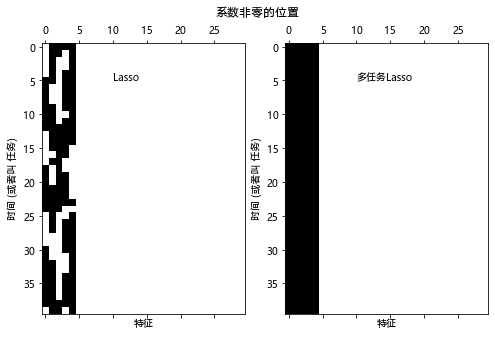



In [ ]:
feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='真实值')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='多任务Lasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

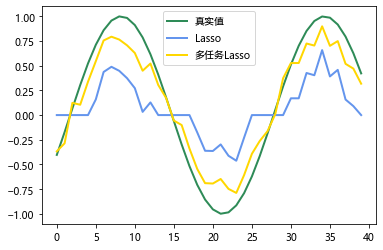